In [38]:
import numpy as np
import pandas as pd
import matplotlib
from datetime import datetime
import re
# import tensorflow as tf
# from tensorflow.keras import layers

In [25]:
# A lot of columns. Display them all.
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# # We can also do the datetime conversion on load
# d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
# df = pd.read_csv(csv_file, parse_dates=['Date'], date_parser=d_parser)

In [3]:
csv_file = 'ETH_1h.csv'
df = pd.read_csv(csv_file)
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [4]:
df.shape

(23674, 7)

In [6]:
df.loc[0, 'Date']

'2020-03-13 08-PM'

In [8]:
# If we had a nicely formatted date string
# df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')

In [9]:
df.loc[0, 'Date'].day_name()

'Friday'

In [10]:
df['Date'].dt.day_name()

0           Friday
1           Friday
2           Friday
3           Friday
4           Friday
5           Friday
6           Friday
7           Friday
8           Friday
9           Friday
10          Friday
11          Friday
12          Friday
13          Friday
14          Friday
15          Friday
16          Friday
17          Friday
18          Friday
19          Friday
20          Friday
21        Thursday
22        Thursday
23        Thursday
24        Thursday
25        Thursday
26        Thursday
27        Thursday
28        Thursday
29        Thursday
30        Thursday
31        Thursday
32        Thursday
33        Thursday
34        Thursday
35        Thursday
36        Thursday
37        Thursday
38        Thursday
39        Thursday
40        Thursday
41        Thursday
42        Thursday
43        Thursday
44        Thursday
45       Wednesday
46       Wednesday
47       Wednesday
48       Wednesday
49       Wednesday
50       Wednesday
51       Wednesday
52       Wed

In [11]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


## Explore

In [12]:
# Earliest = mix, latest = max
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [13]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [15]:
# Create a filter
filt = (df['Date'] >= '2020')


In [19]:
between = df[(df['Date'] > '2020') & (df['Date'] < '2023')]
print(between.head())

                 Date  Symbol    Open    High     Low   Close      Volume  \
0 2020-03-13 20:00:00  ETHUSD  129.94  131.82  126.87  128.71  1940673.93   
1 2020-03-13 19:00:00  ETHUSD  119.51  132.02  117.10  129.94  7579741.09   
2 2020-03-13 18:00:00  ETHUSD  124.47  124.85  115.50  119.51  4898735.81   
3 2020-03-13 17:00:00  ETHUSD  124.08  127.42  121.63  124.47  2753450.92   
4 2020-03-13 16:00:00  ETHUSD  124.85  129.51  120.17  124.08  4461424.71   

  DayOfWeek  
0    Friday  
1    Friday  
2    Friday  
3    Friday  
4    Friday  


In [22]:
df.set_index('Date', inplace=True)

In [23]:
df.head()

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [33]:
df.loc['2019']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [27]:
# Slice
df['2020-01':'2020-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [28]:
# Get avg closing price for all rows of these dates
df['2020-01':'2020-02']['Close']

Date
2020-02-29 23:00:00    217.31
2020-02-29 22:00:00    223.35
2020-02-29 21:00:00    223.48
2020-02-29 20:00:00    224.63
2020-02-29 19:00:00    225.31
                        ...  
2020-01-01 04:00:00    129.56
2020-01-01 03:00:00    129.57
2020-01-01 02:00:00    130.37
2020-01-01 01:00:00    130.14
2020-01-01 00:00:00    128.34
Name: Close, Length: 1440, dtype: float64

In [29]:
# Avg for those rows. Avg for that time.
df['2020-01':'2020-02']['Close'].mean()

195.1655902777778

In [32]:
# Get the high for one day
df.loc['2020-01-01']['High'].max()

132.68

In [37]:
# Daily basis vs. hourly. Highs for each day.
highs = df['High'].resample('D').max()
highs['2020-01-01']

132.68

In [39]:
# Now we can plot by day
%matplotlib inline

<AxesSubplot:xlabel='Date'>

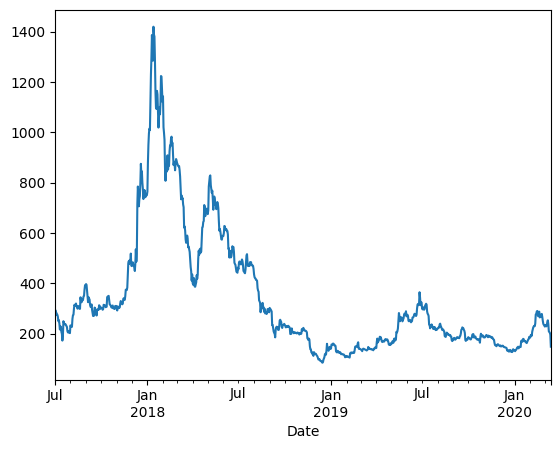

In [40]:
highs.plot()

In [41]:
df.resample('W').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06
2017-07-23,212.351429,215.779286,209.126310,212.783750,4.298593e+06
2017-07-30,203.496190,205.110357,201.714048,203.309524,1.581729e+06
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


In [42]:
df.resample('W').agg({'Close': 'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'})

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08
